# Multi armed bandit

## Thompson sampling algorithm

In the following study the Thompson sampling algorithm was realised and tested against a set of slot-machine simulations with various fixed success probabilities. The simulation was performed over 5000 iterations.

The slot-machines' best estimate evolution, the Beta distribution functions at intermeriate simulation stages as well as the cumulative regret were demonstrated. The algorithm makes use of previous simulation outcomes to perform more educated choice of a slot machine in the next round. Information collection results in the Beta distribution functions localizing the true success probabilities of the slot machines better with each new round. Correspondingly, the cumulative regret increases with a slight saturation as more simulations are being performed.

## Outlook

The Thompson sampling algorithm distinguishes well and fast between multiple slot machines with diverse true success probabilities. The algorithm has however a limitation in reliably distinguishing between slot machines with similar true probabilities of success. 

The limitations of algorithm might be explained by lack of exploration especially at the later stages. These limitations may be addressed via small modifications to the algorithm, e. g.:

1. Adding a small chance of random exploration (inspired by the epsilon-greedy algorithm);

2. Artificially broadening Beta distributions by introducing a small fixed factor to alpha and beta arguments;

3. Instead of considering a single arm with the highest sampled value, consider a random arm from 2-3 arms with highest sampled values;


# Outline
1. [Initial conditions and preparations](#Section_1)

2. [Thompson sampling](#Section_2)

3. [Result exploration](#Section_3)
  * [Best estimate evolution](#Best_choice)
  * [Beta distributions](#Beta_distr)
  * [Cumulative regret](#Cum_regret)

In [1]:

import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import beta
import seaborn as sns

import thompson

<a id='Section_1'></a>
# Initial conditions and preparations

Define initial conditions

In [2]:
arm_probs = [0.10, 0.40, 0.45, 0.60, 0.61] #True arms' probabilities of success
iterations = 5000 #Number of planned simulations

Prepare to collect data for plotting

In [3]:
df_regret = pd.DataFrame(columns=['iter', 'regret'], dtype = int)

arm_choices = {} #Arm chosen at each iteration
for arm in range(len(arm_probs)):
    arm_choices.update({arm:[]})

evol_stages = [int((iterations - 1) * elem) for elem in np.linspace(0, 1, 6)] 
beta_pars_evol = [] #Beta-distribution parameters at learning stages

<a id='Section_2'></a>
# Thompson sampling

Run Thompson sampling over planned simulations. Collect data for plotting.

In [4]:
a, b, regret = thompson.initialize(arm_probs)

for i in range(iterations):
    if i in evol_stages:
        beta_pars_evol.append([copy.copy(a), copy.copy(b)])

    chosen_arm, reward, regret = thompson.thompson_sampl(arm_probs, a, b, regret)
    
    df_regret.loc[i] = [i, regret]
    
    arm_choices[chosen_arm].append(i)
    

<a id='Section_3'></a>
# Result exploration

<a id='Best_choice'></a>
## Best estimate evolution


The algorithm tends to choose the arm with higher probability more often. 

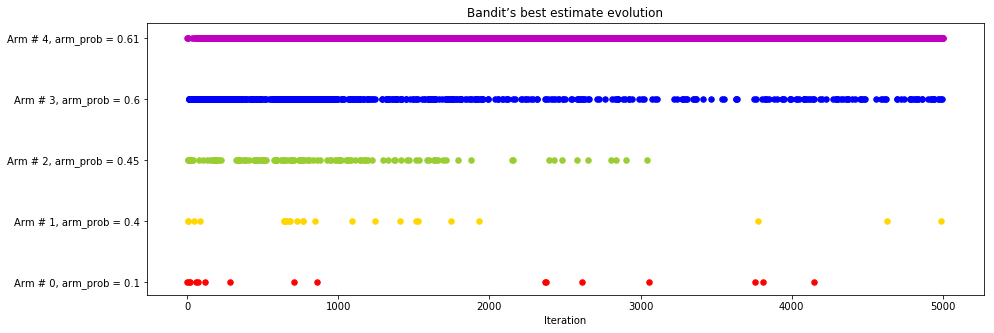

In [5]:
plt.figure(figsize = (15, 5))

y_range = np.arange(0, len(arm_probs))
yticks_labels = []

palette = ['red', 'gold', 'yellowgreen', 'blue', 'm']

for arm, choices in arm_choices.items():
    yticks_labels.append(f'Arm # {str(arm)}, arm_prob = {str(arm_probs[arm])}')
    for choice in choices:
        plt.scatter(choice, arm, color = palette[arm], s = 30, zorder = 3)
        

plt.yticks(y_range, yticks_labels)
plt.xlabel('Iteration')
plt.title('Bandit’s best estimate evolution')
plt.show()

<a id='Beta_distr'></a>
## Beta distributions


The Beta distributions localize the true probabilities of the arms better with more simulations done. 

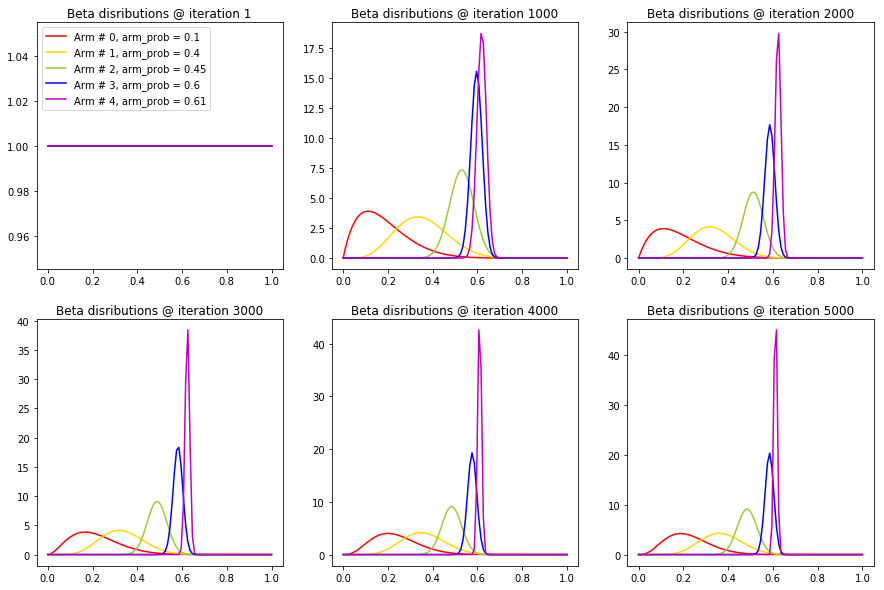

In [6]:
fig, axs = plt.subplots(figsize = (15, 10), ncols = 3, nrows = 2)

x = np.linspace(0, 1, 100)


for stage in range(len(evol_stages)):
    for arm in range(len(arm_probs)):
        alpha_par = beta_pars_evol[stage][0][arm]
        beta_par = beta_pars_evol[stage][1][arm]

        axs[stage // 3][stage % 3].plot(x, beta.pdf(x, alpha_par, beta_par), palette[arm])
    axs[stage // 3][stage % 3].set_title(f'Beta disributions @ iteration {str(evol_stages[stage] + 1)}')

axs[0][0].legend(yticks_labels, loc = 'upper left')

plt.show()

<a id='Cum_regret'></a>
## Cumulative regret


Cumulative regret slighly saturates as more exploration has been done.

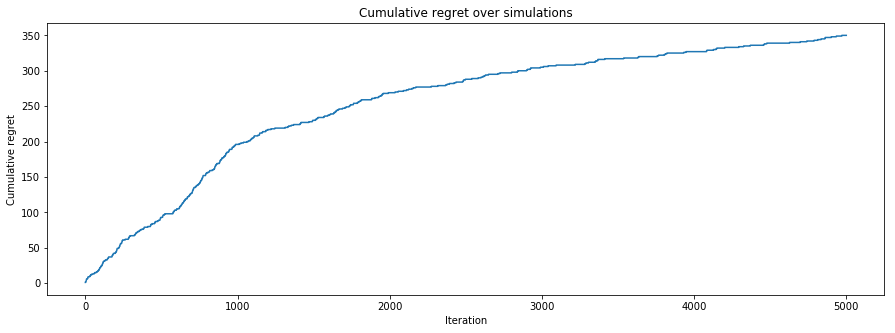

In [7]:
plt.figure(figsize = (15, 5))

sns.lineplot(data = df_regret, x = 'iter', y = 'regret')

plt.title('Cumulative regret over simulations')
plt.ylabel('Cumulative regret')
plt.xlabel('Iteration')
plt.show()